In [55]:
import numpy as np
import pickle
import glob
import os
import sys
sys.path.append('/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/')
from statannotations.Annotator import Annotator

from src.cmos_plotter.Firing_metric_plotter import *

import warnings
import matplotlib.cbook

# Filter out the specific font warning
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")
# OR more specifically:
warnings.filterwarnings("ignore", message="findfont: Font family .* not found")

In [4]:
MAIN_PATH = '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/March2025_heart/'

In [5]:
with open(os.path.join(MAIN_PATH, 'biTE_stimulation/Full_dataset/CSVs/validated_results_full_data_w_speed_and_firing.pkl'), 'rb') as f:
    all_data  = pd.read_pickle(f)

In [32]:
all_data.keys()

Index(['source_electrode', 'target_electrode', 'source_unit_id',
       'target_unit_id', 'lag', 'validation', 'mTE', 'syn probability',
       'latency_extremum', 'electrodes_source_unit', 'electrodes_target_unit',
       'filename', 'Experiment', 'Stimulation_frequency', 'Delay', 'Chip_ID',
       'Network', 'DIV', 'Repetition', 'Status', 'source_speed',
       'target_speed', 'source_firing_rate', 'target_firing_rate',
       'source_isi_mean', 'target_isi_mean', 'source_isi_median',
       'target_isi_median', 'source_isi_std', 'target_isi_std',
       'source_isi_cv', 'target_isi_cv'],
      dtype='object')

In [56]:
def custom_boxplot(data, x_metric, y_metric, hue_metric, axes, order, labely, name_label, fontsize=16, labelsize=14, position_line=-0.12):
 
    # Plot the strip plot
    sns.boxplot(data=data, x=x_metric, y=y_metric,
                 legend=False, zorder=1, ax=axes, order=order, width=0.4, fliersize=0, showfliers=False, color = 'dimgray')
 
    # Add statistical annotations
    pairs = [
        ("before", "after"),
        ("before", "after_2"),
        ("after", "after_2"),
    ]
 
    print(data.columns)
    annotator = Annotator(axes, pairs, data=data, x=hue_metric, y=y_metric, order=order)
    annotator.configure(test='Kruskal', text_format='star', loc='inside', fontsize=fontsize, hide_non_significant=True)
    print(f"\nAnnotate for metric {y_metric}")
    annotator.apply_and_annotate()
    
    plt.rcParams['xtick.bottom'] = True
    plt.rcParams['ytick.left'] = True
    #plt.rcParams['font.family'] = 'Arial'
    axes.set_ylabel(labely, fontsize=fontsize)
    axes.set_xlabel("", fontsize=fontsize)
    axes.grid(True, axis="y", linestyle=':', alpha=0.7)
    axes.tick_params(axis='both', which='major', labelsize=labelsize, width=1.5, length=8)
    #axes.yaxis.set_major_locator(ticker.MaxNLocator(5))
    
    # Add grouped x-axis labels
    axes.tick_params(axis='both', which='major')
    xticks = axes.get_xticks()  # Positions of "Soft", "Inter", "Stiff", etc.
    axes.set_xticks(xticks)  # Position of ticks
    axes.set_xticklabels(["Before stim.", "0-5 min", "5-10 min"])
    
    # Get relative x-ticks position
    x_min, x_max = axes.get_xlim()
    ticks = [(tick - x_min) / (x_max - x_min) for tick in axes.get_xticks()]
 
    # Add secondary x-axis
    axes.text((ticks[1]+ticks[2])/2, position_line-0.07, "After stimulation", ha="center", va="center", transform=axes.transAxes, fontsize=fontsize, weight="bold")
 
    
    # Add lines under each group
    axes.annotate("", xy=(ticks[1]-0.07, position_line), xytext=(ticks[2]+0.07, position_line),
                xycoords='axes fraction', textcoords='axes fraction',
                arrowprops=dict(arrowstyle="-", color="black", lw=1.5))
    plt.savefig(os.path.join(MAIN_PATH, 'biTE_stimulation/Full_dataset/Figures', f'{y_metric}_{name_label}.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(MAIN_PATH, 'biTE_stimulation/Full_dataset/Figures', f'{y_metric}_{name_label}.pdf'), dpi=300, bbox_inches='tight')

In [66]:
all_data['target_speed'].max()

36.04999999999997

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

       source_electrode  target_electrode  source_unit_id  target_unit_id  \
770                 926               911              35               2   
771                2231               911              16               2   
772                 255               911               3               2   
773                 926               255              35               3   
774                2231               255              16               3   
...                 ...               ...             ...             ...   
24466              1309              1523              56              80   
24480              1514              1751              36              63   
24481              1309              1751              55              63   
24482              4171              1751              25              63   
24494             21990              3729               6              26   

        lag validation       mTE  syn probability  \
770     2.0       good

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

       source_electrode  target_electrode  source_unit_id  target_unit_id  \
672                 527             24275               1               6   
676                2056             24275              16              11   
677                1623             24275              26              11   
678                2056             24275              30              11   
679                2512             24275              22              11   
...                 ...               ...             ...             ...   
26282              4755              9593              90              63   
26285             12465              5215              12              84   
26288             14226              4098              10              78   
26290              1908              1908              88               7   
26312             11147             12689              28               6   

       lag validation       mTE  syn probability  \
672    6.0       good  

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

       source_electrode  target_electrode  source_unit_id  target_unit_id  \
900                2495              2056              28              12   
909                2056             24717              12              23   
917                2512              2495               3              27   
919                 527             24275               2               1   
920               25161             24275              24               1   
...                 ...               ...             ...             ...   
25368              6528             11147              39               6   
25369              1026             11147              51               6   
25370              1468             11147              69               6   
25371              1468             11147              62               6   
25372              7627             11147              71               6   

       lag validation       mTE  syn probability  \
900    1.0       good  

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

       source_electrode  target_electrode  source_unit_id  target_unit_id  \
286               23116             25755               4               2   
287               23116             25755               0               2   
288                1120             25755              32               2   
289                 898             25755              38               2   
290                2000             25755              30               2   
...                 ...               ...             ...             ...   
26148             22456              1117               0              34   
26149              2000              1117              24              34   
26150              1120              1117              33              34   
26151               680             22456              30               0   
26152              1999             22456              29               0   

        lag validation       mTE  syn probability  \
286     1.0       good

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

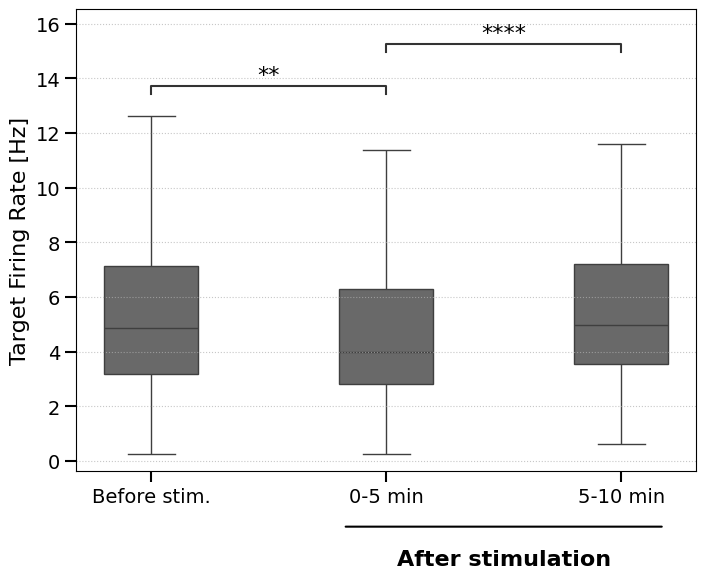

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

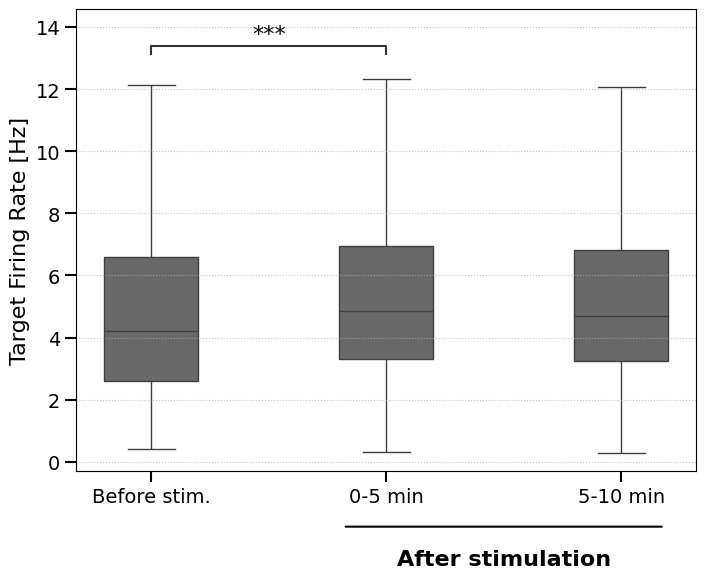

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

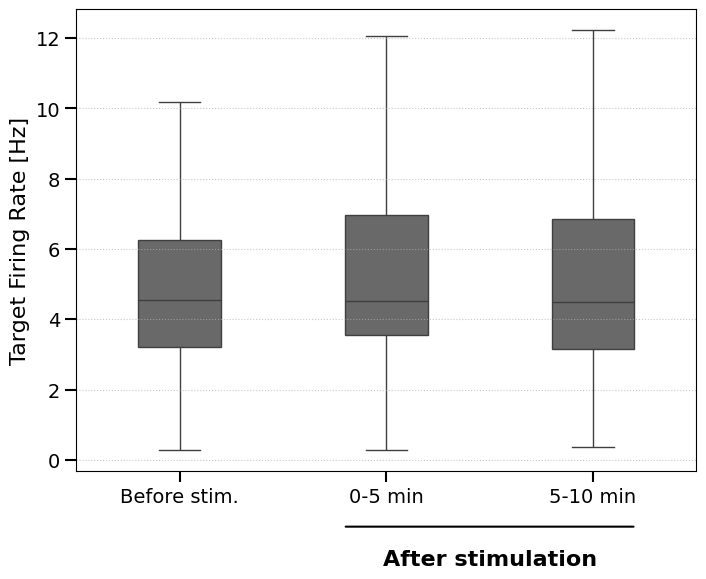

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

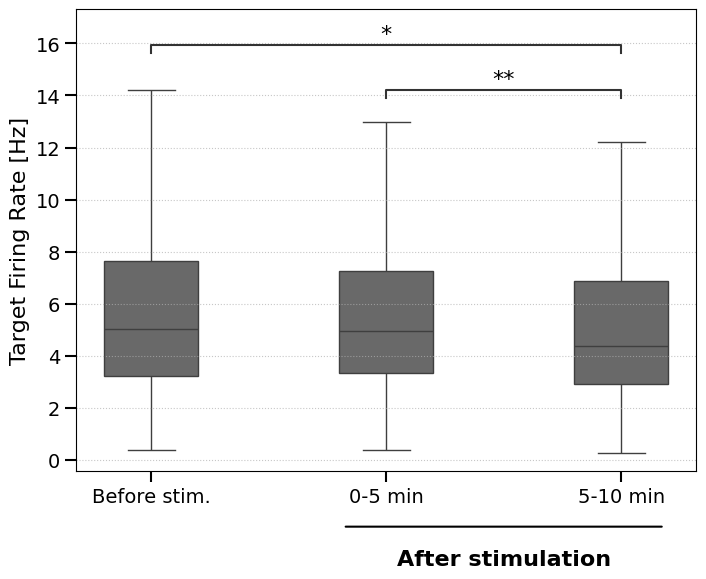

In [63]:
frequencies = ['5_Hz', '10_Hz', '20_Hz', '40_Hz']
for frequency in frequencies:
    filt = 0.0
    # Filter data for the specific frequency and delay
    filt_data = all_data[all_data['syn probability'] > filt]
    filt_data = filt_data[(filt_data['Stimulation_frequency'] == frequency) & (filt_data['Delay'] == '0_ms') ]
    print(filt_data)
    
    # Create a new DataFrame for the boxplot
    new_df = filt_data.copy()
    #new_df['firing_rate'] = pd.concat([filt_data['source_firing_rate'], filt_data['target_firing_rate']], axis=0).reset_index(drop=True)
    #new_df['Status'] = pd.concat([filt_data['Status'], filt_data['Status']], axis=0).reset_index(drop=True)
    #new_df['conduction_speed'] = pd.concat([filt_data['source_speed'], filt_data['target_speed']], axis=0).reset_index(drop=True)
    
    # Create the boxplot
    fig, axes = plt.subplots(figsize=(8, 6))
    custom_boxplot(new_df, 'Status', 'target_firing_rate', 'Status', axes, ['before', 'after', 'after_2'], 'Target Firing Rate [Hz]', frequency+f'_{filt*100}prob', fontsize=16, labelsize=14, position_line=-0.12)

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

       source_electrode  target_electrode  source_unit_id  target_unit_id  \
770                 926               911              35               2   
771                2231               911              16               2   
772                 255               911               3               2   
775                 926               255              41               3   
784                 926              1573              41              10   
...                 ...               ...             ...             ...   
24460              1952              2390              47              68   
24462              1309              2628              56              71   
24464              1523              1958              83              77   
24465              1309              1958              56              77   
24494             21990              3729               6              26   

       lag validation       mTE  syn probability  \
770    2.0       good  

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

       source_electrode  target_electrode  source_unit_id  target_unit_id  \
672                 527             24275               1               6   
676                2056             24275              16              11   
677                1623             24275              26              11   
678                2056             24275              30              11   
680                2512              2056              22              16   
...                 ...               ...             ...             ...   
26282              4755              9593              90              63   
26285             12465              5215              12              84   
26288             14226              4098              10              78   
26290              1908              1908              88               7   
26312             11147             12689              28               6   

       lag validation       mTE  syn probability  \
672    6.0       good  

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

       source_electrode  target_electrode  source_unit_id  target_unit_id  \
900                2495              2056              28              12   
909                2056             24717              12              23   
919                 527             24275               2               1   
920               25161             24275              24               1   
921                2495              2512              27               3   
...                 ...               ...             ...             ...   
25368              6528             11147              39               6   
25369              1026             11147              51               6   
25370              1468             11147              69               6   
25371              1468             11147              62               6   
25372              7627             11147              71               6   

       lag validation       mTE  syn probability  \
900    1.0       good  

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

       source_electrode  target_electrode  source_unit_id  target_unit_id  \
286               23116             25755               4               2   
287               23116             25755               0               2   
289                 898             25755              38               2   
303                1999             25095              33               9   
304                2000             25095              30               9   
...                 ...               ...             ...             ...   
26139              4859               678              11              31   
26146              2658              1120              23              33   
26147             22456              1117               6              34   
26151               680             22456              30               0   
26152              1999             22456              29               0   

       lag validation       mTE  syn probability  \
286    1.0       good  

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

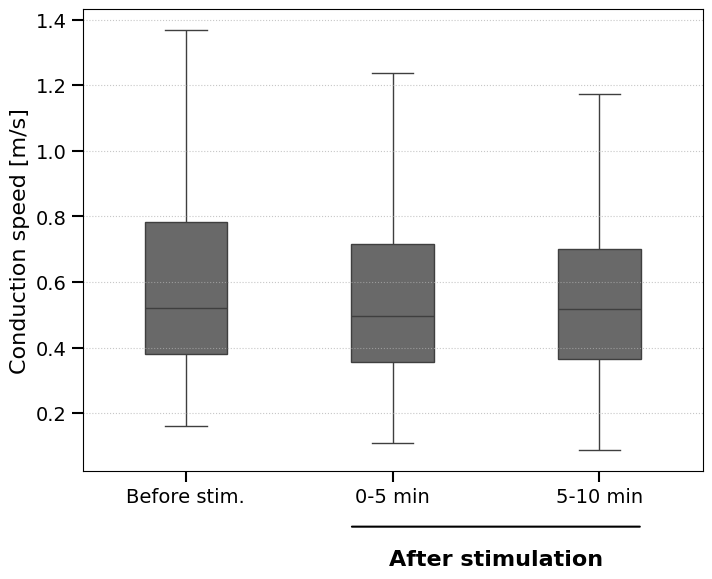

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

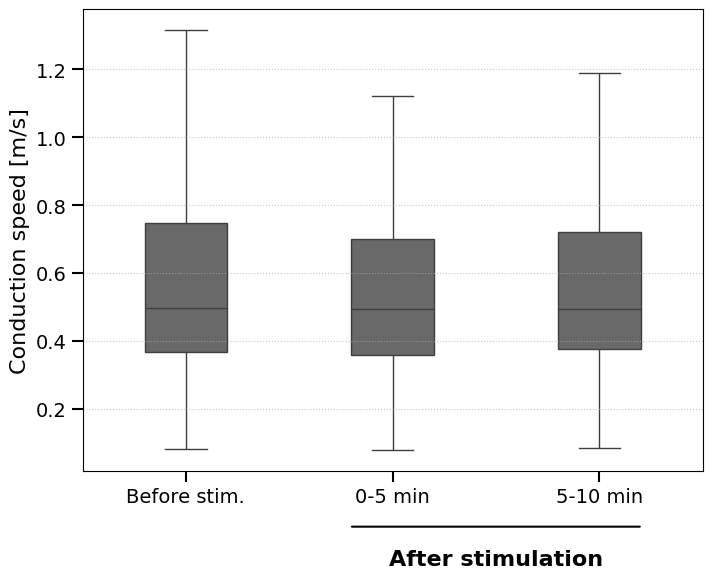

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

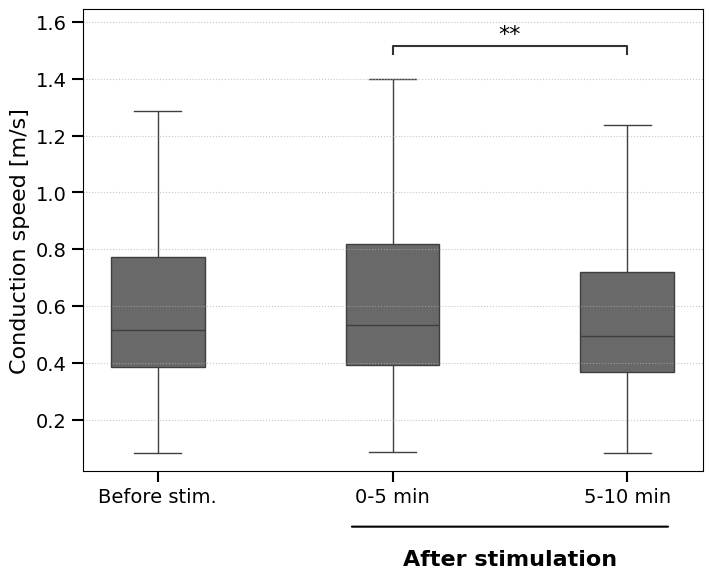

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

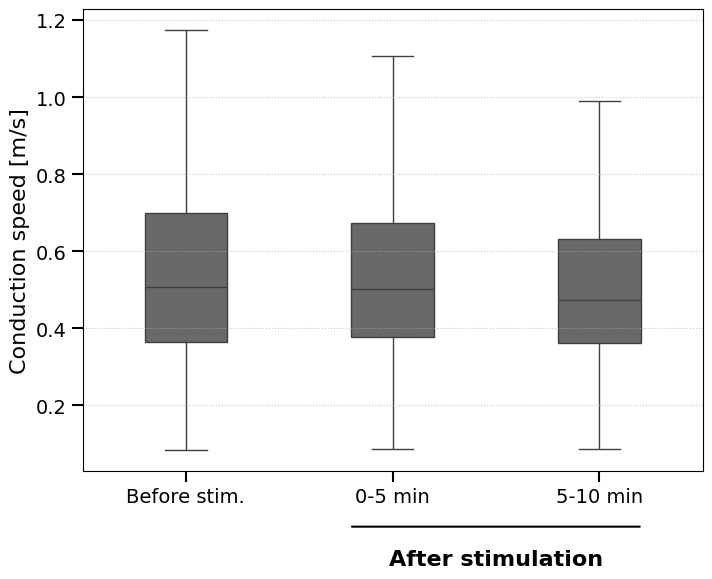

In [57]:
frequencies = ['5_Hz', '10_Hz', '20_Hz', '40_Hz']
for frequency in frequencies:
    filt = 0.05
    # Filter data for the specific frequency and delay
    filt_data = all_data[all_data['syn probability'] > filt]
    filt_data = filt_data[(filt_data['Stimulation_frequency'] == frequency) & (filt_data['Delay'] == '0_ms') ]
    print(filt_data)
    
    # Create a new DataFrame for the boxplot
    new_df = pd.DataFrame()
    new_df['firing_rate'] = pd.concat([filt_data['source_firing_rate'], filt_data['target_firing_rate']], axis=0).reset_index(drop=True)
    new_df['Status'] = pd.concat([filt_data['Status'], filt_data['Status']], axis=0).reset_index(drop=True)
    new_df['conduction_speed'] = pd.concat([filt_data['source_speed'], filt_data['target_speed']], axis=0).reset_index(drop=True)
    
    # Create the boxplot
    fig, axes = plt.subplots(figsize=(8, 6))
    custom_boxplot(new_df, 'Status', 'conduction_speed', 'Status', axes, ['before', 'after', 'after_2'], 'Conduction speed [m/s]', frequency+f'_{filt*100}prob', fontsize=16, labelsize=14, position_line=-0.12)

In [3]:
filename = 'ID2184_N5_DIV7_DATE20250321_1210_spontaneous_reseed.raw_processed.pkl'
data = pickle.load(open(os.path.join(MAIN_PATH, f'Sorters/{filename}'), 'rb'))
print(data.keys())

dict_keys(['CHIP_ID', 'NW_ID', 'DIV', 'EXPERIMENT_DURATION', 'SPIKEMAT_EXTREMUM', 'SPIKEMAT', 'UNIT_TO_EL', 'BLANKING'])


In [4]:
data['SPIKEMAT']

array([('12273', 1.65, -91.24955811), ('11157', 1.65, -62.74821677),
       ('9621', 1.65, -45.27802456), ..., ('6768', 1.7 , -71.34810977),
       ('21509', 1.65, -51.20591146), ('18643', 1.55, -78.51322766)],
      dtype=[('Electrode', '<U10'), ('Spike_Time', '<f8'), ('Amplitude', '<f8')])

In [ ]:
filtered_filenames = [
    "ID2816_0_DIV32_DATE20250415_1116_spontaneous_40Hz.raw_processed.pkl",
    "ID2816_0_DIV32_DATE20250415_1126_spontaneous_40Hz.raw_processed.pkl",
    "ID2816_0_DIV32_DATE20250415_1126_spontaneous_40Hz_0.raw_processed.pkl",
    "ID2816_0_DIV32_DATE20250415_1145_spontaneous_40Hz.raw_processed.pkl",
    "ID2816_0_DIV32_DATE20250415_1155_spontaneous_40Hz.raw_processed.pkl",
    "ID2816_0_DIV32_DATE20250415_1155_spontaneous_40Hz_0.raw_processed.pkl",
    "ID2816_0_DIV32_DATE20250415_1213_spontaneous_40Hz.raw_processed.pkl",
    "ID2816_0_DIV32_DATE20250415_1224_spontaneous_40Hz.raw_processed.pkl",
    "ID2816_0_DIV32_DATE20250415_1224_spontaneous_40Hz_0.raw_processed.pkl"
]


In [3]:
#0 ms 5 Hz
filtered_filenames = ["ID2816_1_DIV35_DATE20250418_1541_spontaneous_FreqVar0ms.raw_processed.pkl",
                    "ID2816_1_DIV35_DATE20250418_1552_spontaneous_FreqVar0ms.raw_processed.pkl",
                    "ID2816_1_DIV35_DATE20250418_1552_spontaneous_FreqVar0ms_0.raw_processed.pkl"]

In [4]:
# Find all pickle files
pickle_files = glob(os.path.join(MAIN_PATH,"*.pkl"))

pickle_files = [f for f in pickle_files if os.path.basename(f) in filtered_filenames]
print(pickle_files)
# Initialize lists for both types of results
all_extremum_results = []
all_spikemat_results = []

# Process each file
for file in pickle_files:
    print(f"Processing {file}...")
    extremum_results, spikemat_results = process_spike_data(file)
    all_extremum_results.extend(extremum_results)
    all_spikemat_results.extend(spikemat_results)


['/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/March2025_heart/Sorters_stimulation/250418_stimulation/ID2816_1_DIV35_DATE20250418_1541_spontaneous_FreqVar0ms.raw_processed.pkl', '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/March2025_heart/Sorters_stimulation/250418_stimulation/ID2816_1_DIV35_DATE20250418_1552_spontaneous_FreqVar0ms.raw_processed.pkl', '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/March2025_heart/Sorters_stimulation/250418_stimulation/ID2816_1_DIV35_DATE20250418_1552_spontaneous_FreqVar0ms_0.raw_processed.pkl']
Processing /itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/March2025_heart/Sorters_stimulation/250418_stimulation/ID2816_1_DIV35_DATE20250418_1541_spontaneous_FreqVar0ms.raw_processed.pkl...
Processing /itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Da

In [5]:
#save to pickle
with open(os.path.join(MAIN_PATH,'Results/all_extremum_results_5Hz_0ms.pkl'), 'wb') as f:
    pickle.dump(all_extremum_results, f)
with open(os.path.join(MAIN_PATH,'Results/all_spikemat_results_5Hz_0ms.pkl'), 'wb') as f:
    pickle.dump(all_spikemat_results, f)

FileNotFoundError: [Errno 2] No such file or directory: '/itet-stor/kvulic/neuronies/single_neurons/1_Subprojects/Neurons_As_DNNs/3_Processed_Data/March2025_heart/Sorters_stimulation/250418_stimulation/Results/all_extremum_results_5Hz_0ms.pkl'

In [7]:
before_filenames = ["ID2816_0_DIV32_DATE20250415_1116_spontaneous_40Hz.raw_processed.pkl",
                    "ID2816_0_DIV32_DATE20250415_1145_spontaneous_40Hz.raw_processed.pkl",
                    "ID2816_0_DIV32_DATE20250415_1213_spontaneous_40Hz.raw_processed.pkl"
                    ]
after_filenames = ["ID2816_0_DIV32_DATE20250415_1126_spontaneous_40Hz.raw_processed.pkl",
                   "ID2816_0_DIV32_DATE20250415_1155_spontaneous_40Hz.raw_processed.pkl",
                   "ID2816_0_DIV32_DATE20250415_1224_spontaneous_40Hz.raw_processed.pkl"]
after_2_filenames = ["ID2816_0_DIV32_DATE20250415_1126_spontaneous_40Hz_0.raw_processed.pkl",
                    "ID2816_0_DIV32_DATE20250415_1155_spontaneous_40Hz_0.raw_processed.pkl",
                    "ID2816_0_DIV32_DATE20250415_1224_spontaneous_40Hz_0.raw_processed.pkl"]

In [6]:
before_filenames = ["ID2816_1_DIV35_DATE20250418_1541_spontaneous_FreqVar0ms.raw_processed.pkl"]
after_filenames = ["ID2816_1_DIV35_DATE20250418_1552_spontaneous_FreqVar0ms.raw_processed.pkl"]
after_2_filenames = ["ID2816_1_DIV35_DATE20250418_1552_spontaneous_FreqVar0ms_0.raw_processed.pkl"]

In [7]:
#plot firing rate from all_extremum_results with standard error of mean as box plot for before, after and after_2 all on the same plot
def plot_firing_rate_comparison(results_before, results_after, results_after_2):
    firing_rates_before = [result['firing_rate'] for result in results_before]
    firing_rates_after = [result['firing_rate'] for result in results_after]
    firing_rates_after_2 = [result['firing_rate'] for result in results_after_2]

    plt.figure(figsize=(6, 6))
    plt.boxplot([firing_rates_before, firing_rates_after, firing_rates_after_2], labels=['Before', 'After', 'After 2'])
    plt.title('Firing Rate Comparison')
    plt.ylabel('Firing Rate (Hz)')
    plt.grid()
    plt.show()


/tmp/ipykernel_3273/154223569.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([firing_rates_before, firing_rates_after, firing_rates_after_2], labels=['Before', 'After', 'After 2'])


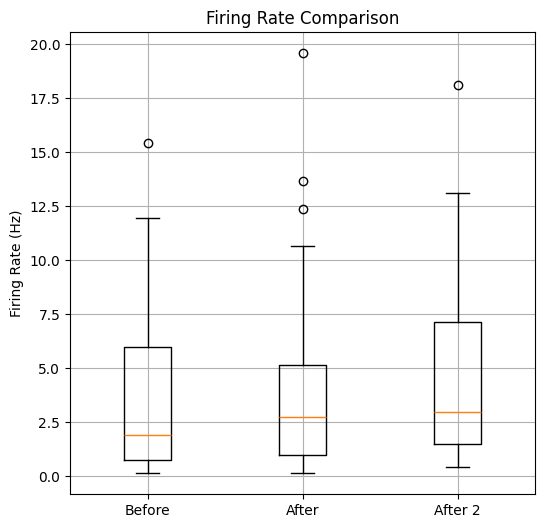

In [8]:
plot_firing_rate_comparison(
    [result for result in all_extremum_results if os.path.basename(result['filename']) in before_filenames],
    [result for result in all_extremum_results if os.path.basename(result['filename']) in after_filenames],
    [result for result in all_extremum_results if os.path.basename(result['filename']) in after_2_filenames]
)

In [6]:
save_path = os.path.join(MAIN_PATH, 'Results')
specific_div = 35
extremum = True
electrode = True
# Create output directory for plots and saved files
output_dir = save_path if save_path else "."
plots_dir = os.path.join(output_dir, 'plots')
os.makedirs(plots_dir, exist_ok=True)

# Set the DIV for box plots
box_plot_div = specific_div if specific_div is not None else 28

# File paths for unit-level data
unit_pkl_file = os.path.join(output_dir, 'combined_unit_metrics.pkl')
unit_csv_file = os.path.join(output_dir, 'combined_unit_metrics.csv')

# File paths for electrode-level data
electrode_pkl_file = os.path.join(output_dir, 'combined_electrode_metrics.pkl')
electrode_csv_file = os.path.join(output_dir, 'combined_electrode_metrics.csv')


# Process SPIKEMAT_EXTREMUM results (unit-level)
if extremum:
    if not (os.path.exists(unit_pkl_file) and os.path.exists(unit_csv_file)):
        df_extremum = pd.DataFrame(all_extremum_results)
        print(f"Processed {len(df_extremum)} units from SPIKEMAT_EXTREMUM data.")
        
        # Save combined data to new pickle file
        with open(unit_pkl_file, 'wb') as f:
            pickle.dump(df_extremum, f)
        print(f"Unit-level data saved to '{unit_pkl_file}'")
        
        # Save as CSV for easy viewing
        df_extremum.to_csv(unit_csv_file, index=False)
        print(f"Unit-level data also saved to '{unit_csv_file}'")
    else:
        df_extremum = pd.read_pickle(unit_pkl_file)
        print(f"Unit-level data loaded from '{unit_pkl_file}'")
    
    # Generate combined subplot for all metrics
    create_combined_div_plot(df_extremum, "unit", plots_dir)
    
    # Generate box plots for specified DIV
    create_specific_div_boxplot(df_extremum, box_plot_div, "unit", plots_dir)
else:
    print("No unit-level (SPIKEMAT_EXTREMUM) data processed.")

# Process SPIKEMAT results (electrode-level)
if electrode:
    if not (os.path.exists(electrode_pkl_file) and os.path.exists(electrode_csv_file)):
        df_spikemat = pd.DataFrame(all_spikemat_results)
        print(f"Processed {len(df_spikemat)} electrodes from SPIKEMAT data.")
        
        # Save combined data to new pickle file
        with open(electrode_pkl_file, 'wb') as f:
            pickle.dump(df_spikemat, f)
        print(f"Electrode-level data saved to '{electrode_pkl_file}'")
        
        # Save as CSV for easy viewing
        df_spikemat.to_csv(electrode_csv_file, index=False)
        print(f"Electrode-level data also saved to '{electrode_csv_file}'")
    else:
        df_spikemat = pd.read_pickle(electrode_pkl_file)
        print(f"Electrode-level data loaded from '{electrode_pkl_file}'")
    
    # Generate combined subplot for all metrics
    create_combined_div_plot(df_spikemat, "electrode", plots_dir)
    
    # Generate box plots for specified DIV
    create_specific_div_boxplot(df_spikemat, box_plot_div, "electrode", plots_dir)
else:
    print("No electrode-level (SPIKEMAT) data processed.")

Processed 5229 units from SPIKEMAT_EXTREMUM data.
Unit-level data saved to '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/Results/combined_unit_metrics.pkl'
Unit-level data also saved to '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/Results/combined_unit_metrics.csv'
Saved /itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/Results/plots/unit_combined_metrics_by_div.png


/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/src/cmos_plotter/Firing_metric_plotter.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/src/cmos_plotter/Firing_metric_plotter.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/src/cmos_plotter/Firing_metric_plotter.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/src/cmos_plotter/Firing_metric_plotter.py:316: UserWarning: set_ticklabels() should

Saved /itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/Results/plots/unit_div35_boxplots.png
Processed 98043 electrodes from SPIKEMAT data.
Electrode-level data saved to '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/Results/combined_electrode_metrics.pkl'
Electrode-level data also saved to '/itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/Results/combined_electrode_metrics.csv'
Saved /itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/Results/plots/electrode_combined_metrics_by_div.png


/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/src/cmos_plotter/Firing_metric_plotter.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/src/cmos_plotter/Firing_metric_plotter.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/src/cmos_plotter/Firing_metric_plotter.py:316: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/home/kvulic/Vulic/cmos_toolbox_w_spike_sorter/src/cmos_plotter/Firing_metric_plotter.py:316: UserWarning: set_ticklabels() should

Saved /itet-stor/kvulic/neuronies/single_neurons/3_Student_Projects/Amelie/Processed_data/Sorters/Results/plots/electrode_div35_boxplots.png


In [15]:
save_path = os.path.join(MAIN_PATH, 'Results')
with open(os.path.join(save_path, 'combined_unit_metrics.pkl'), 'rb') as f:
    df_extremum = pd.DataFrame(pickle.load(f))

In [ ]:
plt.errorbar(mean_firing_rate.index, mean_firing_rate, yerr=sem_firing_rate, fmt='-o', color='cornflowerblue')


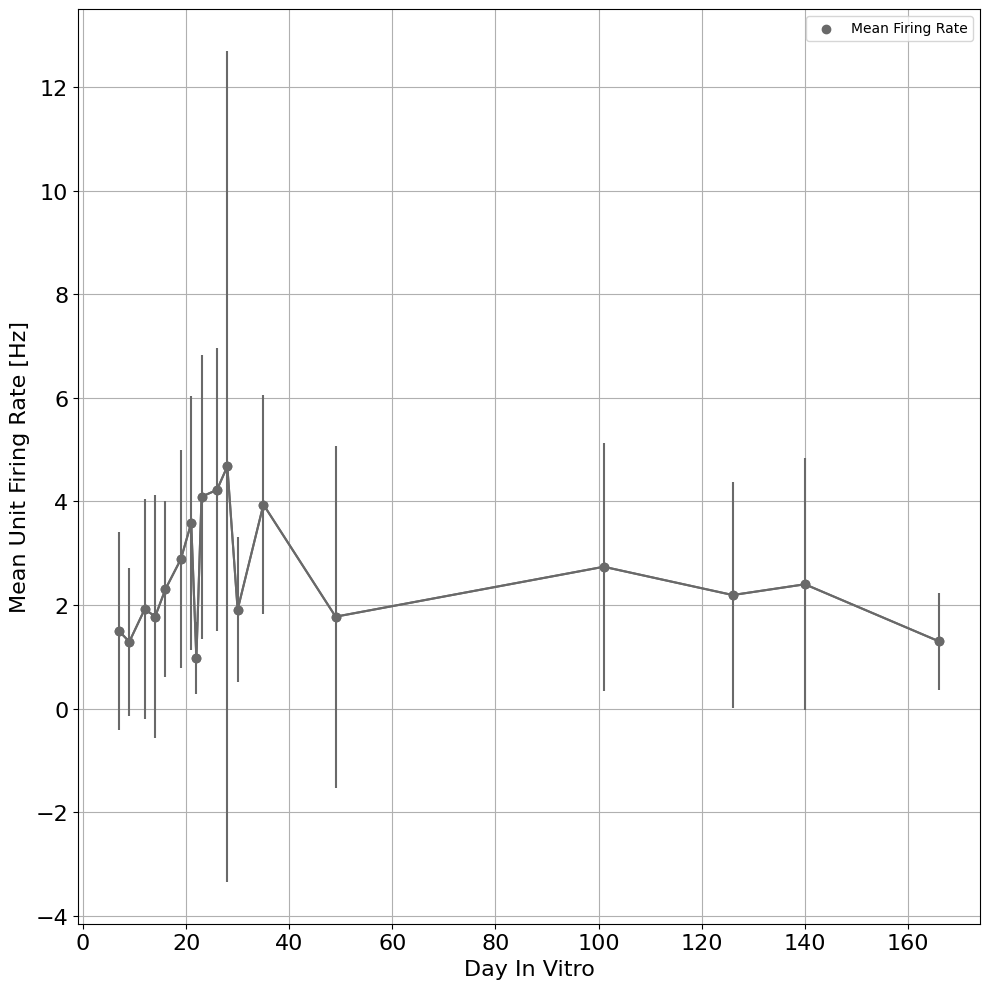

In [10]:
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

#remove rows with div == 98 from df_extremum
df_extremum = df_extremum[df_extremum['div'] != 42]
df_extremum = df_extremum[df_extremum['div'] != 58]



# Calculate mean and SEM for firing_rate grouped by div
grouped = df_extremum.groupby('div')['firing_rate']
mean_firing_rate = grouped.mean()
sem_firing_rate = grouped.std()

# Create the plot
plt.figure(figsize=(10, 10))
plt.plot(mean_firing_rate.index, mean_firing_rate, color='dimgrey')
plt.errorbar(mean_firing_rate.index, mean_firing_rate, yerr=sem_firing_rate, fmt='-o', color='dimgrey')
plt.scatter(mean_firing_rate.index, mean_firing_rate, color='dimgrey',label='Mean Firing Rate')

#plt.title('Mean Firing Rate per DIV')
plt.xlabel('Day In Vitro', fontsize=16)
plt.ylabel('Mean Unit Firing Rate [Hz]', fontsize=16)
#increase fontsize on x and y
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'plots/Mean_Firing_Rate_per_DIV.png'), dpi=300)
plt.savefig(os.path.join(save_path, 'plots/Mean_Firing_Rate_per_DIV.pdf'), format = 'pdf', dpi=300)


plt.show()


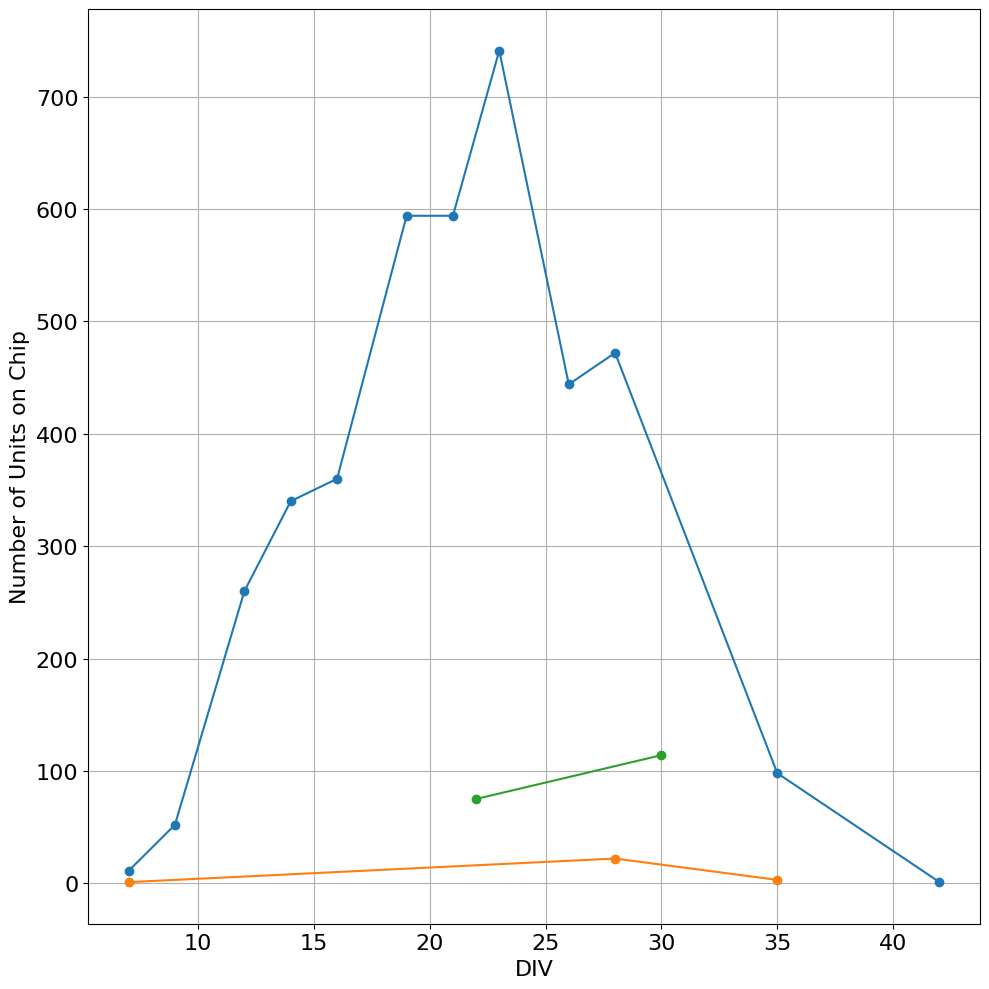

In [16]:
# Summarize the number of units per chip for each DIV
#leave only until div 42
df_extremum = df_extremum[df_extremum['div'] <= 42]


units_per_div = df_extremum.groupby(['chip_id', 'div']).size().reset_index(name='unit_count')

# Plot the number of units vs DIV
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for chip_id, group in units_per_div.groupby('chip_id'):
    plt.plot(group['div'], group['unit_count'], marker='o')

plt.xlabel('DIV', fontsize=16)
plt.ylabel('Number of Units on Chip', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim(0, 450)
#plt.legend(title='Chip ID')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'plots/Number_of_units_per_DIV.png'), dpi=300)
plt.savefig(os.path.join(save_path, 'plots/Number_of_units_per_DIV.pdf'), format = 'pdf', dpi=300)
plt.show()



